In [1]:
#%%
#import tools
from sklearn import datasets
import pandas as pd

In [2]:
#create dataframe
transdata = pd.read_csv("card_transdata - with sample ID.csv")
transdata = transdata.dropna(axis=1, how='any')
transdata.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


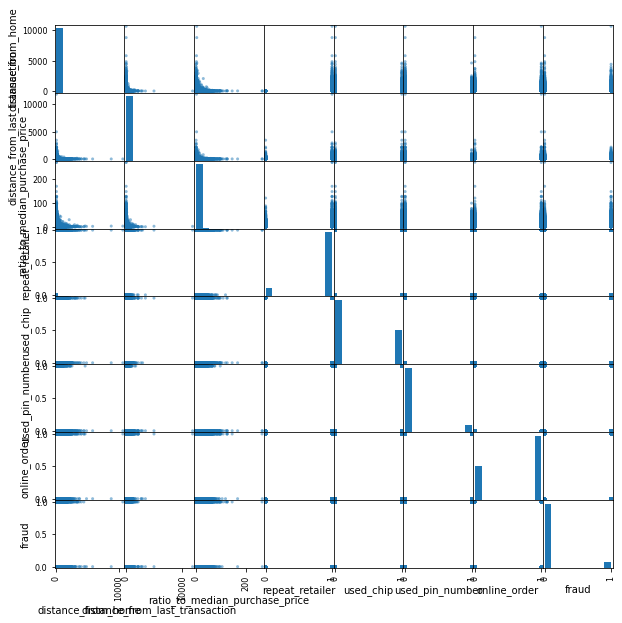

In [3]:
# %%
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(transdata, figsize=(10,10))
plt.show()

In [4]:
features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
X = transdata[features].values
y = transdata['fraud'].values

In [5]:
#standardize colums in X using StandardScaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
pd.DataFrame(data = X, columns = features).head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.477882,-0.182849,0.043491,0.366584,1.361576,-0.334458,-1.364425
1,-0.241607,-0.188094,-0.189300,0.366584,-0.734443,-0.334458,-1.364425
2,-0.329369,-0.163733,-0.498812,0.366584,-0.734443,-0.334458,0.732909
3,-0.372854,0.021806,-0.522048,0.366584,1.361576,-0.334458,0.732909
4,0.268572,-0.172968,0.142373,0.366584,1.361576,-0.334458,0.732909


In [6]:
#PCA projection to a 2-D Space
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pincipalComponents = pca.fit_transform(X)

In [20]:
#New dataset from principal components
df_pca = pd.DataFrame(data = pincipalComponents, columns = ['PC1', 'PC2'])
target = pd.Series(transdata['fraud'], name = 'fraud')

#Concat the principal components with the target columns
result_df = pd.concat([df_pca, target], axis = 1)
result_df.head(5)

,PC1,PC2,fraud
0,0.599697,0.910923,0
1,0.112068,-0.483109,0
2,0.031041,-0.532946,0
3,-0.021408,0.916912,0
4,0.432741,0.931201,0


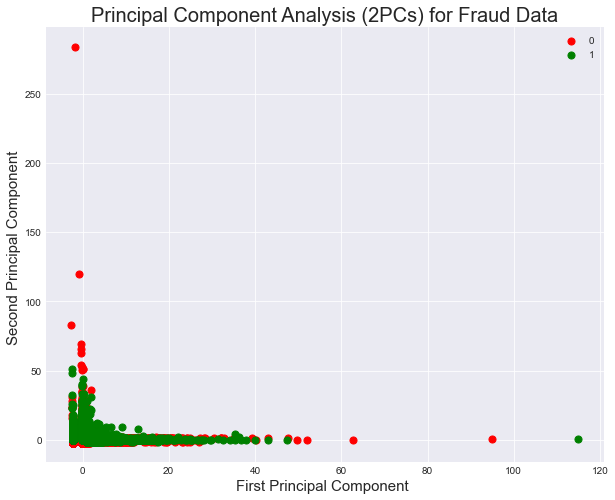

In [21]:
# Principal Components scatter plot
plt.style.use('seaborn-dark')
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Fraud Data', fontsize = 20)

# Assuming that your target values are 0, 1, and 2
targets = [0, 1, 2]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = transdata['fraud'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [22]:
loadings = pca.components_
print ("weight of each item:", loadings)
print (features)

weight of each item: [[ 7.07017593e-01 -3.72278637e-03 -1.14052511e-04  7.06987728e-01
  -1.00266517e-02 -9.93367812e-03 -9.02173796e-03]
 [ 6.90272196e-03  6.16613515e-01  1.95600621e-01 -4.15417769e-04
   6.39449102e-01 -4.15429976e-01 -1.76953817e-03]]
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']


In [23]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.16330953 0.14329428]

 Total Variance Explained: 30.66


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X = transdata[features].values
y = transdata['fraud'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
print('Accuracy:', acc)


Accuracy: 0.98375


In [25]:
result_df.head()

,PC1,PC2,fraud
0,0.599697,0.910923,0
1,0.112068,-0.483109,0
2,0.031041,-0.532946,0
3,-0.021408,0.916912,0
4,0.432741,0.931201,0


In [32]:
# Run the classifer on PCA'd data
X = result_df[['PC1', 'PC2']]
y = result_df['fraud']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train.values, Y_train.values)
Yhat = model.predict(X_test.values)
acc = metrics.accuracy_score(Yhat, Y_test.values)
print('Accuracy:', acc)
precision = metrics.precision_score(Yhat, Y_test.values)
print('Precision:', precision)
recall = metrics.recall_score(Yhat, Y_test.values)
print('Recall:', recall)
F1 = metrics.f1_score(Yhat, Y_test.values)
print('F1 score:', F1)

Accuracy: 0.911535
Precision: 0.3800951671157484
Recall: 0.49074759437453735
F1 score: 0.42839143217135656


In [33]:
#Try lasso or ridge regression to increase Recall
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [35]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, Y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, Y_train)

lin = LinearRegression()
lin.fit(X_train_transformed, Y_train)

LinearRegression()

In [36]:
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = lasso.predict(X_train_transformed)
y_h_lasso_test = lasso.predict(X_test_transformed)

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

In [38]:
print('Train Error Ridge Model', mean_squared_error(Y_train, y_h_ridge_train))
print('Test Error Ridge Model', mean_squared_error(Y_test, y_h_ridge_test))
print('\n')

print('Train Error Lasso Model', mean_squared_error(Y_train, y_h_lasso_train))
print('Test Error Lasso Model', mean_squared_error(Y_test, y_h_lasso_test))
print('\n')

print('Train Error Unpenalized Linear Model', mean_squared_error(Y_train, y_h_lin_train))
print('Test Error Unpenalized Linear Model', mean_squared_error(Y_test, y_h_lin_test))

Train Error Ridge Model 0.07682053738036561
Test Error Ridge Model 0.0765377356334991


Train Error Lasso Model 0.07980249749999999
Test Error Lasso Model 0.07960859900000002


Train Error Unpenalized Linear Model 0.07681646072325342
Test Error Unpenalized Linear Model 0.07652149253207996
